In [126]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pyt
%matplotlib inline



```
# This is formatted as code
```

# Homework 1b Part 2: Pandas

Today we'll practice data exploration in pandas! Each of these cells should consist of **a single line of pandas**, answering the question.

First, you'll need to download the dataset "Top American Colleges 2022" from Kaggle.com and get it into this directory. You'll need to make an account first.

Below is a list of useful functions. Part of this homework is practicing reading the documentation, so you'll want to look them up as you go. I'd recommend starting with this: https://pandas.pydata.org/docs/user_guide/10min.html. Once you've read that, in general you can find the API for any of these functions by searching their name plus pandas.

List of helpful functions:

* read_csv
* head
* unique
* groupby
* apply (An important note about this one--pay careful attention to the weird axis argument. When you apply over a series, you often don't need it, but when you apply over a dataframe axis=1 and axis=0 will do very different things.)
* value_counts
* df.columns ('columns' is a dataframe variable that tracks the columns)
* isin
* fillna
* astype
* hist

***Remember, all answers must be in A SINGLE LINE OF CODE. ***

## The Basics

First, read the dataframe in. Store it in a variable called "df".

In [105]:
df = pd.read_csv('/home/tomas/cmsc320/HW1_Pandas/top_colleges_2022.csv')

Let's get a feel for our dataframe. Print out a list of columns

In [3]:
df.columns

Index(['description', 'rank', 'organizationName', 'state', 'studentPopulation',
       'campusSetting', 'medianBaseSalary', 'longitude', 'latitude', 'website',
       'phoneNumber', 'city', 'country', 'state.1', 'region', 'yearFounded',
       'stateCode', 'collegeType', 'carnegieClassification',
       'studentFacultyRatio', 'totalStudentPop', 'undergradPop',
       'totalGrantAid', 'percentOfStudentsFinAid', 'percentOfStudentsGrant'],
      dtype='object')

Now print out the first ten elements. There's a single function that does it by default.

In [73]:
df.head(10)

,description,rank,organizationName,state,studentPopulation,campusSetting,medianBaseSalary,longitude,latitude,website,...,yearFounded,stateCode,collegeType,carnegieClassification,studentFacultyRatio,totalStudentPop,undergradPop,totalGrantAid,percentOfStudentsFinAid,percentOfStudentsGrant
0,"A leading global research university, MIT attr...",1,Massachusetts Institute of Technology,MA,12195,Urban,173700.0,-71.093539,42.359006,http://web.mit.edu,...,1861.0,MA,Private not-for-profit,Doctoral Universities: Very High Research Acti...,3,12195,4582,35299332.0,75.0,60.0
1,Stanford University sits just outside of Palo ...,2,Stanford University,CA,20961,Suburban,173500.0,-122.168924,37.431370,http://www.stanford.edu,...,1891.0,CA,Private not-for-profit,Doctoral Universities: Very High Research Acti...,4,20961,8464,51328461.0,70.0,55.0
2,One of the top public universities in the coun...,2,"University of California, Berkeley",CA,45878,Urban,154500.0,-122.258393,37.869236,http://www.berkeley.edu,...,1868.0,CA,Public,Doctoral Universities: Very High Research Acti...,19,45878,33208,64495611.0,63.0,53.0
3,Princeton is a leading private research univer...,4,Princeton University,NJ,8532,Urban,167600.0,-74.659119,40.349855,http://www.princeton.edu,...,1746.0,NJ,Private not-for-profit,Doctoral Universities: Very High Research Acti...,4,8532,5516,44871096.0,62.0,61.0
4,"Located in upper Manhattan, Columbia Universit...",5,Columbia University,NY,33882,Urban,148800.0,-73.961288,40.806515,http://www.columbia.edu,...,1754.0,NY,Private not-for-profit,Doctoral Universities: Very High Research Acti...,6,33882,8689,44615007.0,58.0,54.0
5,"The University of California, Los Angeles is t...",6,"University of California, Los Angeles",CA,46947,Urban,137200.0,-118.437855,34.073903,http://ucla.edu,...,1919.0,CA,Public,Doctoral Universities: Very High Research Acti...,18,46947,33641,61100980.0,73.0,67.0
6,"Located in rural Williamstown, MA, Williams Co...",7,Williams College,MA,2307,Rural,152600.0,-73.208078,42.712389,http://www.williams.edu,...,1793.0,MA,Private not-for-profit,Baccalaureate Colleges: Arts & Sciences Focus,6,2307,2251,15204855.0,62.0,52.0
7,Yale University is the second oldest Ivy Leagu...,8,Yale University,CT,14910,Urban,163700.0,-72.923425,41.314042,http://www.yale.edu,...,1701.0,CT,Private not-for-profit,Doctoral Universities: Very High Research Acti...,4,14910,7199,48430359.0,61.0,53.0
8,Duke offers 53 undergraduate majors at its Dur...,9,Duke University,NC,17855,Urban,155000.0,-78.940277,36.001389,http://www.duke.edu,...,1924.0,NC,Private not-for-profit,Doctoral Universities: Very High Research Acti...,6,17855,7278,41087604.0,63.0,47.0
9,"Founded by Benjamin Franklin, The University o...",10,University of Pennsylvania,PA,30688,Urban,164000.0,-75.162369,39.952270,http://www.upenn.edu,...,1740.0,PA,Private not-for-profit,Doctoral Universities: Very High Research Acti...,6,30688,14202,59744979.0,57.0,47.0


## Exploration

Now let's learn to do some exploration. Try printing out the median of  "medianBaseSalary"


In [6]:
df['medianBaseSalary'].median()

112800.0

Making it a little more complicated--print out the median of  "medianBaseSalary" but only for urban colleges.

In [16]:
df[df['campusSetting'] == 'Urban']['medianBaseSalary'].median()

113100.0

Now, still using one statement, let's print out median of "medianBaseSalary" for all different possible values of "campusSetting". You'll need a statement we haven't used yet.

In [21]:
df.groupby('campusSetting')['medianBaseSalary'].median()

campusSetting
Rural       111450.0
Suburban    113500.0
Urban       113100.0
Name: medianBaseSalary, dtype: float64

Print out the number of colleges by state. Your results should look something like:

NY    63<br>
CA    55

etc.

In [25]:
df['state'].value_counts()

state
NY    63
CA    55
PA    33
MA    27
TX    26
NJ    16
IL    16
MI    15
OH    15
VA    14
FL    14
WA    13
IN    12
MN    12
MD    12
NC    11
GA     9
OR     9
TN     9
CT     8
MO     8
WI     8
CO     7
SC     6
AL     5
RI     5
DC     5
IA     5
UT     4
LA     4
AZ     4
VT     4
ME     4
NH     4
KY     4
OK     3
ID     3
NE     3
NM     3
MS     2
MT     2
ND     2
SD     2
HI     2
AR     2
NV     2
KS     2
PR     1
WV     1
WY     1
DE     1
Name: count, dtype: int64

Display just the line for University of Maryland (either one). (There are a couple of ways of doing this.)

In [35]:
df[df['organizationName'] == 'University of Maryland, College Park']

,description,rank,organizationName,state,studentPopulation,campusSetting,medianBaseSalary,longitude,latitude,website,...,yearFounded,stateCode,collegeType,carnegieClassification,studentFacultyRatio,totalStudentPop,undergradPop,totalGrantAid,percentOfStudentsFinAid,percentOfStudentsGrant
39,"The University of Maryland, College Park, is a...",40,"University of Maryland, College Park",MD,44404,Suburban,124500.0,-76.937269,38.980725,http://www.umd.edu,...,1858.0,MD,Public,Doctoral Universities: Very High Research Acti...,17,44404,32954,28679244.0,67.0,53.0


## Modifications

Let's start modifying our dataframe! Remember, dataframe operations return a copy by default, so you'll either need to use the inplace=True, or just assign the dataframe back into itself (as in, df = df.someFunction()).

Start by filling in all blank phone numbers with "no number"



In [58]:
df['phoneNumber'] = df['phoneNumber'].fillna("no number")


Take the website column and change it so that no string includes "http://", "https://" or "www"

In [110]:
df['website'] = df['website'].str.replace('http://|https://|www', 'website', regex=True)

Create a new column called "faculty" that computes the number of faculty at each university

In [115]:
df['faculty'] = None

## Graphs

Let's do some very basic graphing here! Create a histogram for the student population.

array([[<Axes: title={'center': 'studentPopulation'}>]], dtype=object)

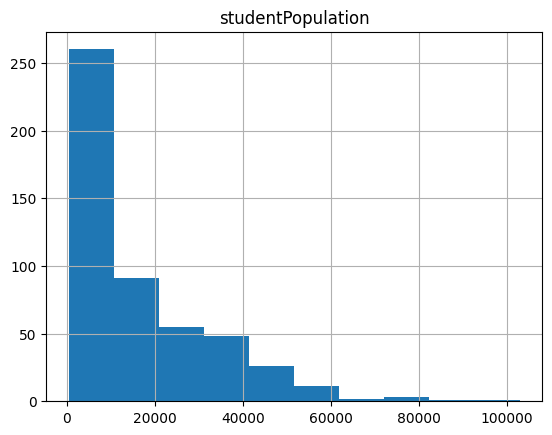

In [127]:
df.hist(column='studentPopulation')